In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [44]:
ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
             ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
#('8137-9101', 0.118865),

ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
             ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8135-1902', 0.117997), ('8137-3702', 0.131997),
             ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
             ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [45]:
def spectrum_gen(flux, ivar):    
    n = len(flux)
    sumflux = np.zeros(4563)

    for i in range(n):
        for j in range(n):
            flux_ = flux[i,j] * ~do_not_use[i,j]
            flux_filtered = sigma_gen_compare(ivar[i,j], flux_)
            sumflux = np.add(sumflux, flux_)
    return sumflux

In [46]:
def sigma_gen_compare(ivar, flux_masked):
    
    # change ivar array to sigma array 
    
    sigma = np.sqrt(np.abs(np.divide(1, ivar, where = ivar != 0)))
#     print(sigma)
    
    is_less_than_3sigma = flux_masked < 3 * sigma # compare the sigma array 
#     print(flux_masked)
#     print(is_less_than_3sigma)
        
    flux_masked_filtered = flux_masked * ~is_less_than_3sigma # multiply the truth value
    
    return flux_masked_filtered

In [47]:
def gaussian(x, amp, mean, sigma, base):
    return (amp * np.exp(-(x-mean)**2 / (2*sigma**2))) + base

In [48]:
(6583+6548)/2, 6583-6548, 6555, 6575

(6565.5, 35, 6555, 6575)

In [49]:
k = np.array([1,2,3,4,5,6])
np.average(k)

3.5

In [50]:
# np.where(np.logical_and(wave > 6555, wave < 6576))

In [51]:
# wave[2577], wave[2590]

In [52]:
lb = 2577
ub = 2590

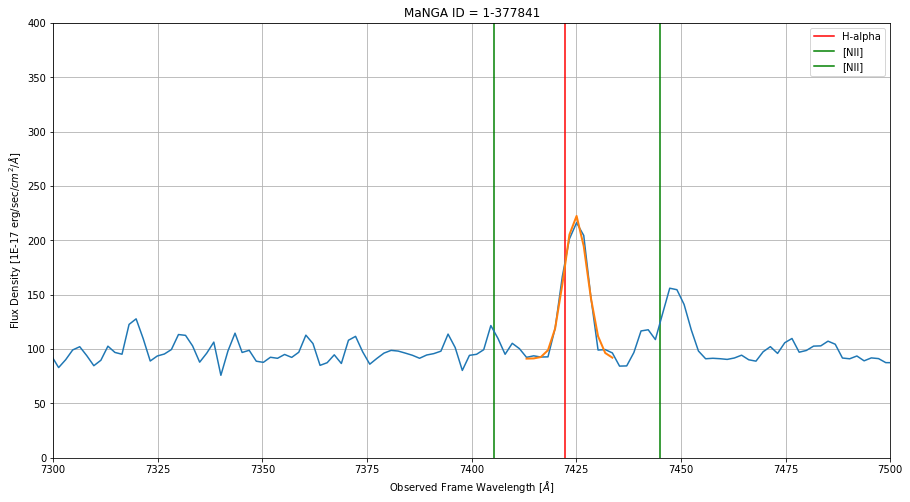

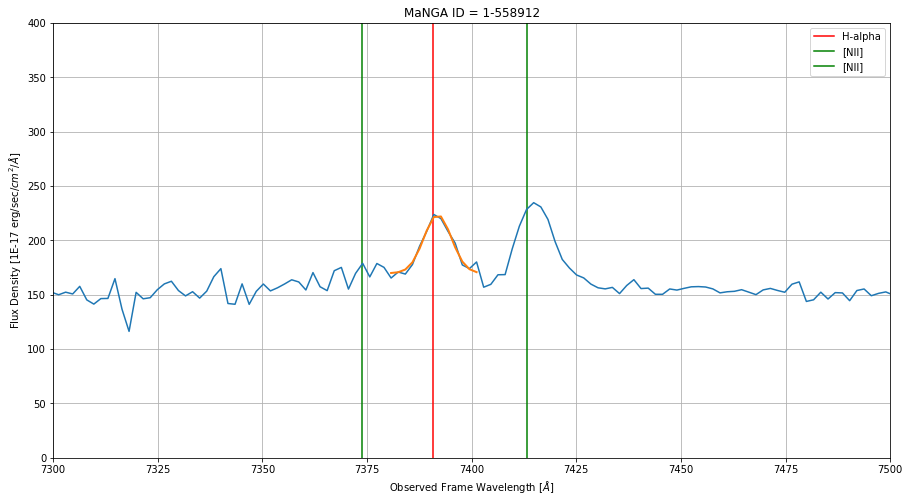

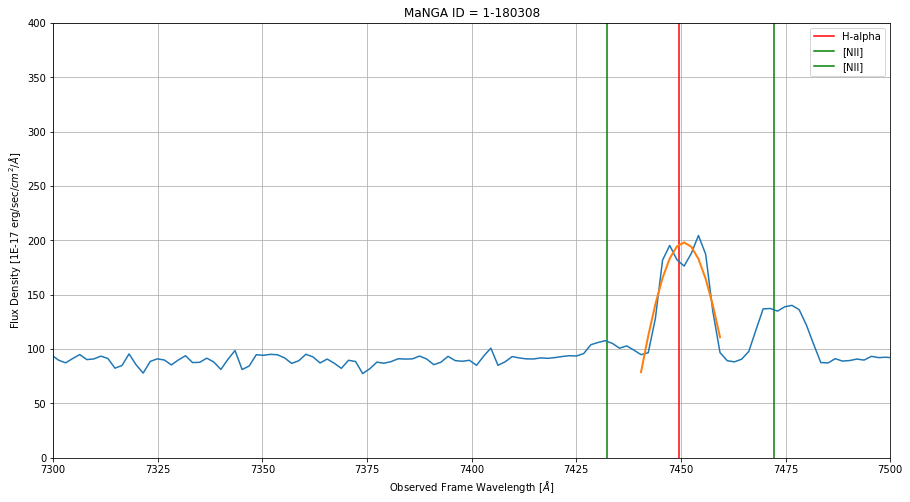

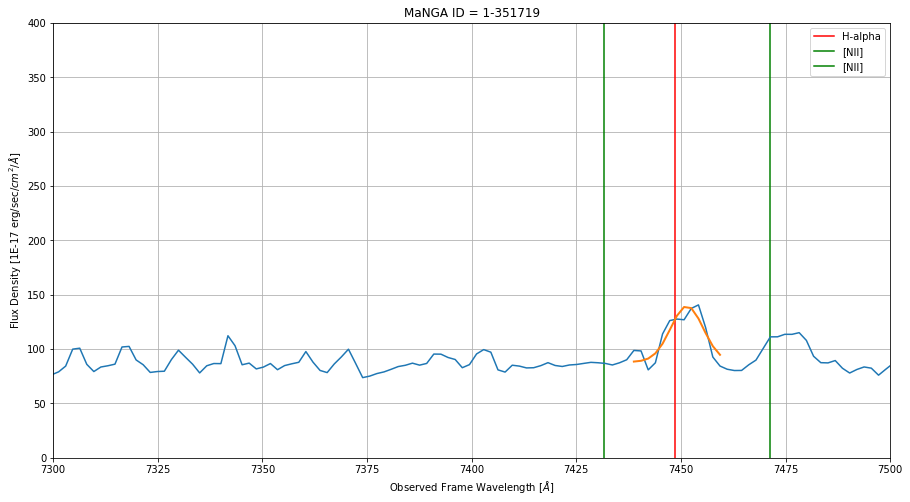

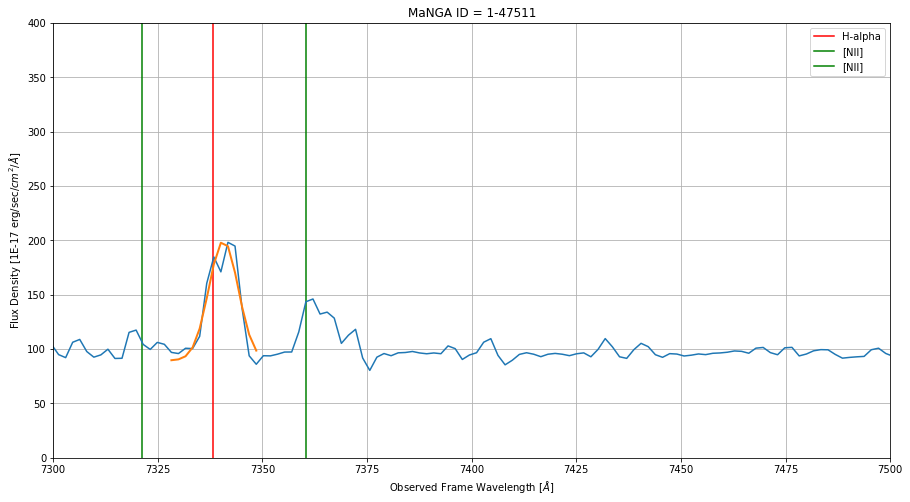

In [55]:
for plateifu in ha_list:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak = 6563*(1+plateifu[1])
#     print(peak)
    bound = np.where(np.logical_and(wave > peak-10, wave < peak+13))
    lb = bound[0][0]
    ub = bound[0][-1]
#     print(lb, ub)
#     print(wave[lb], wave[ub])
    
    sumflux_slice = sumflux[lb : ub]
#     print(sumflux_slice)
    wave_slice = wave[lb : ub]
    
# #     print(sumflux)
    
    amp = max(sumflux_slice)
    mean = peak
    sigma = 5
#     sigma = np.std(sumflux_slice)
    base = min(sumflux_slice)
    
#     print('amp', amp)
#     print('sigma', sigma)
#     print('base', base)
    
    popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
#     print('popt', popt)
#     print('pcov', pcov)
    
#     plt.plot(wave_slice, gaussian(wave_slice, *popt))
#     plt.show()
    
#     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7300, 7500)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, gaussian(wave_slice, *popt), linewidth = 2)
    
    plt.show()

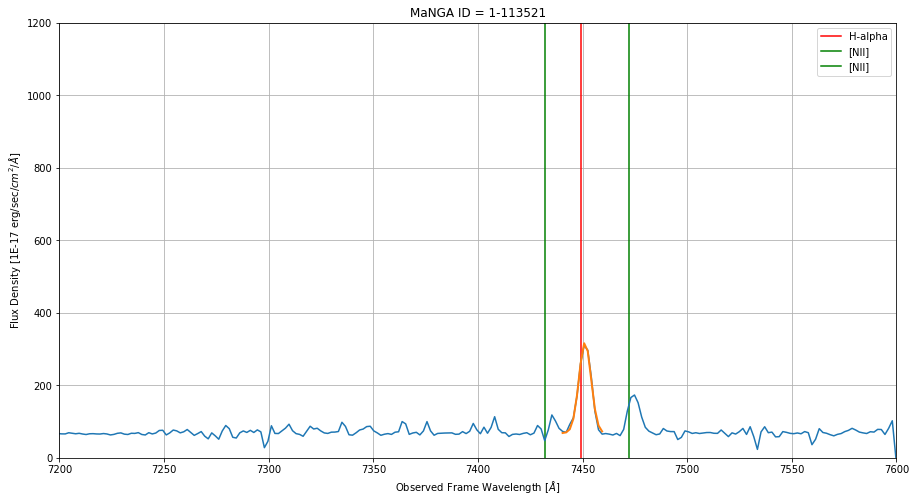

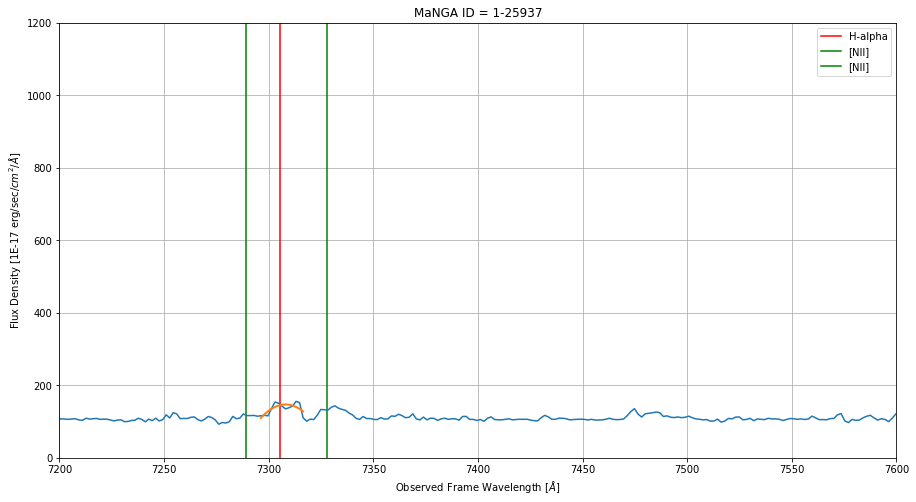

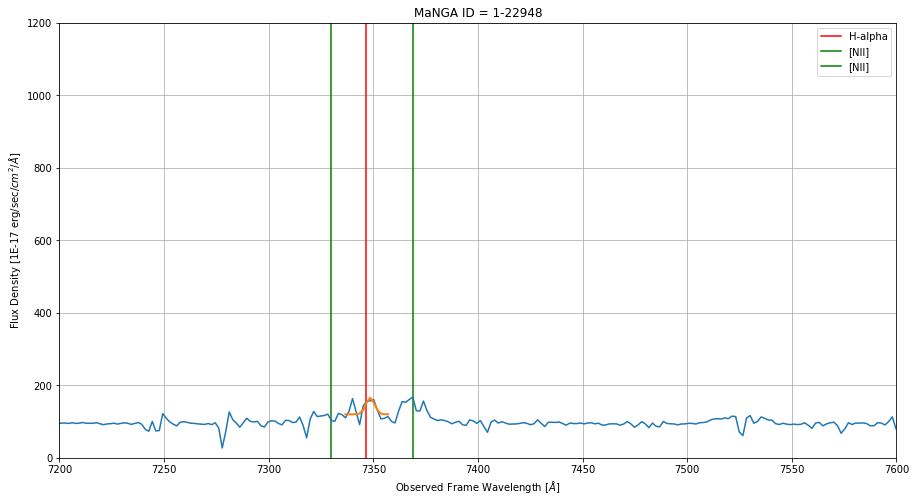

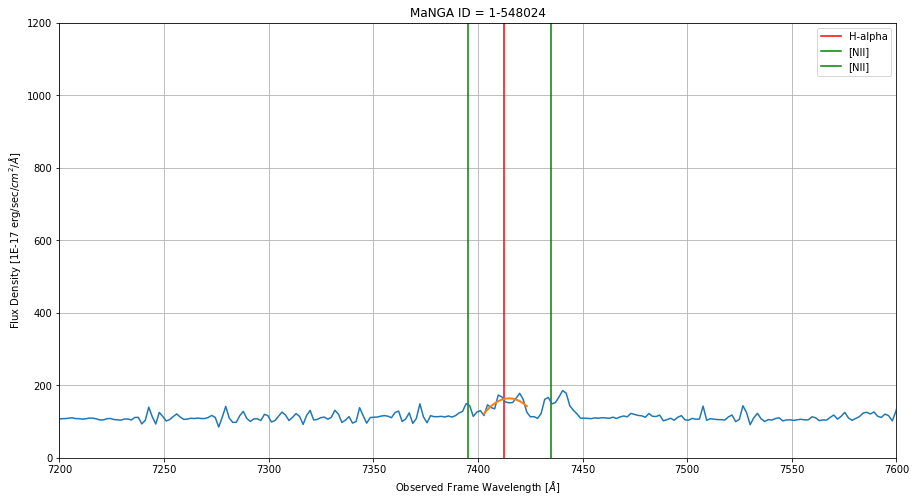

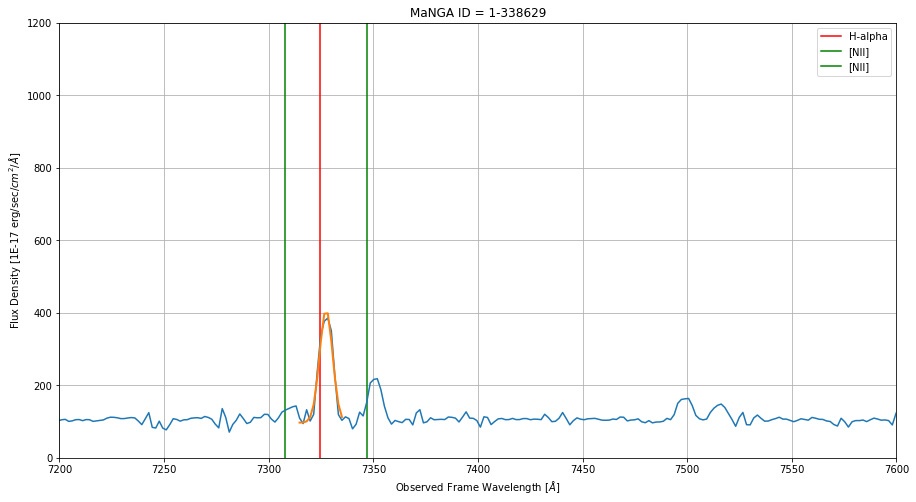

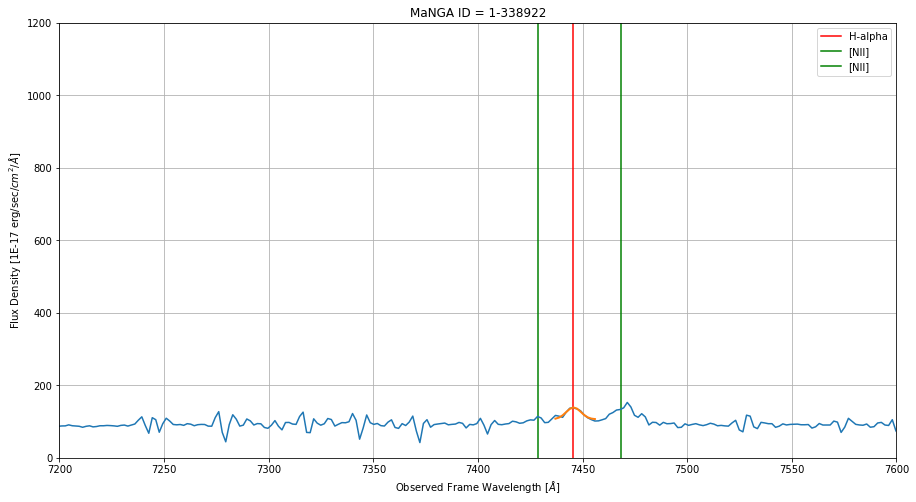

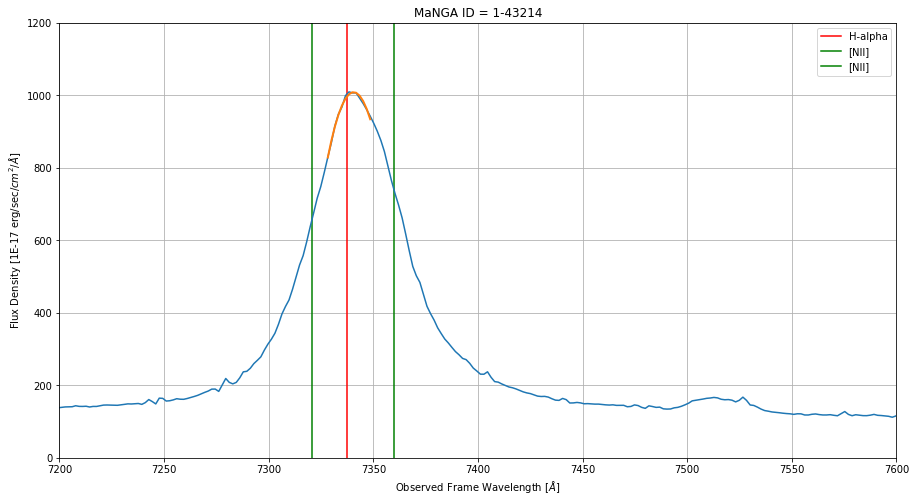

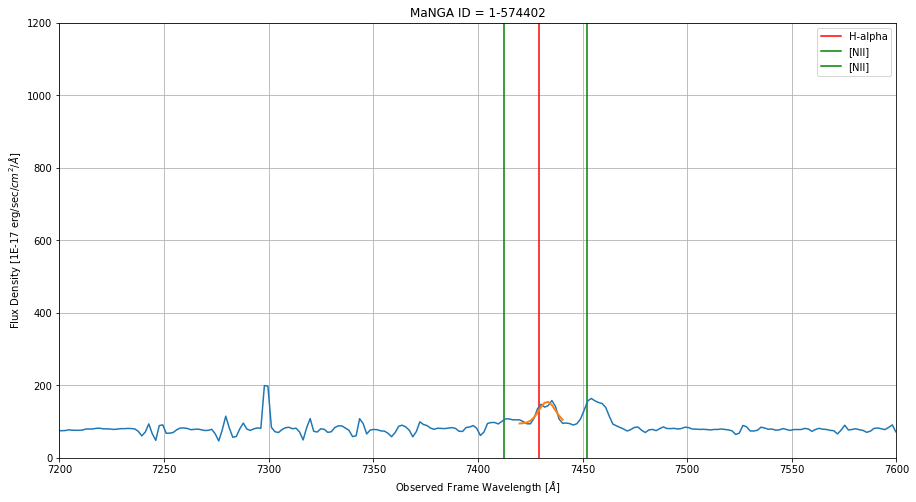

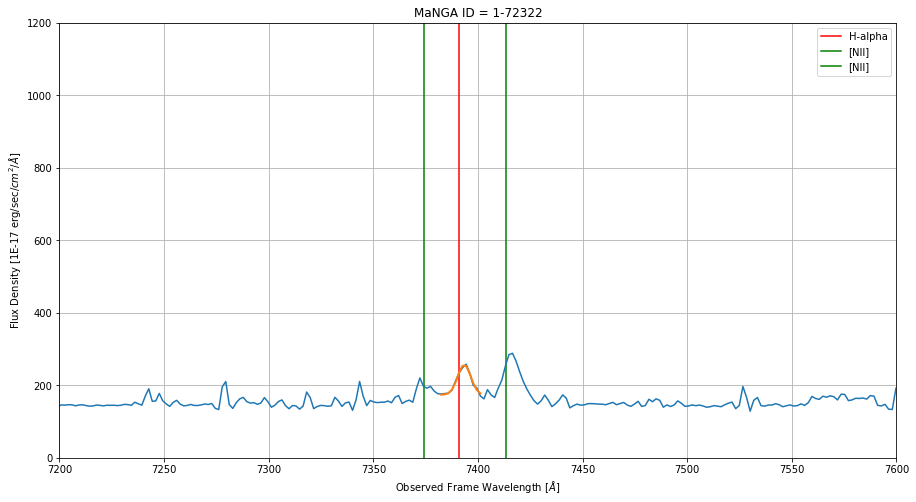

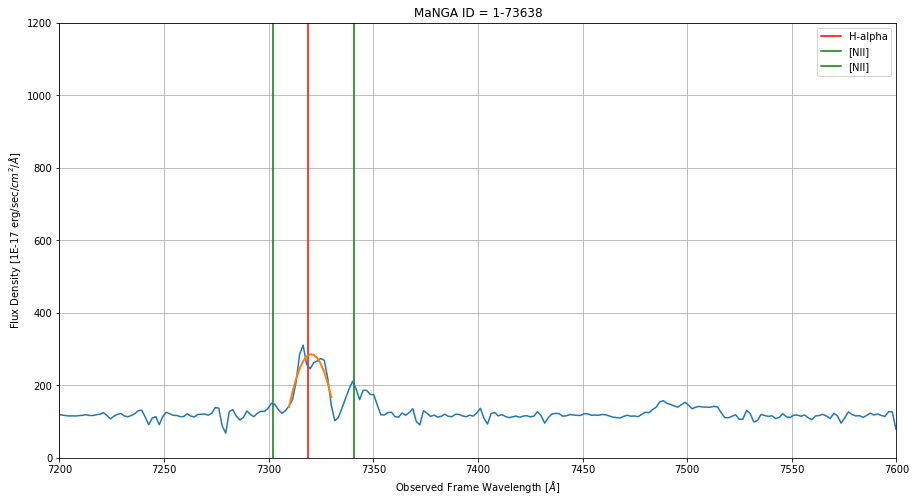

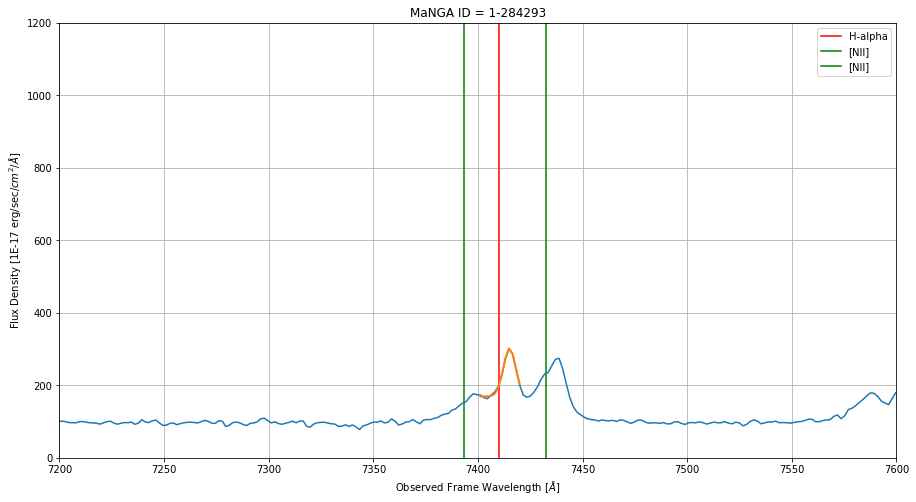

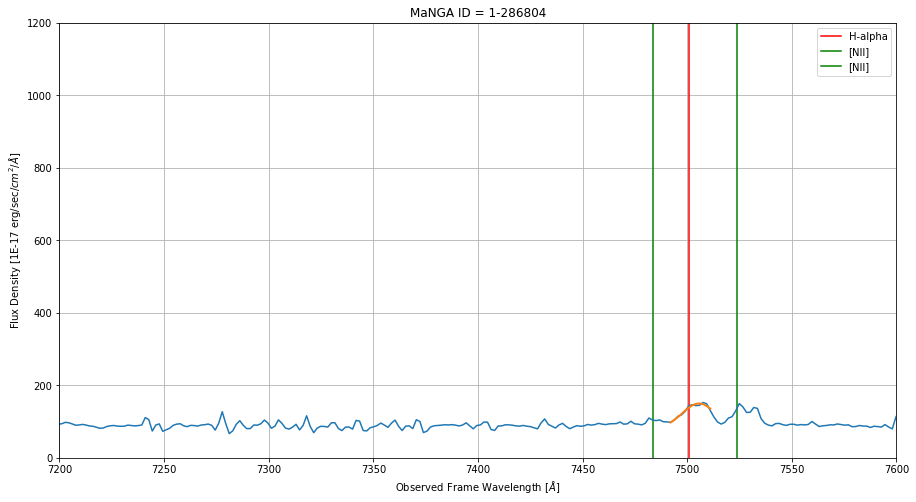

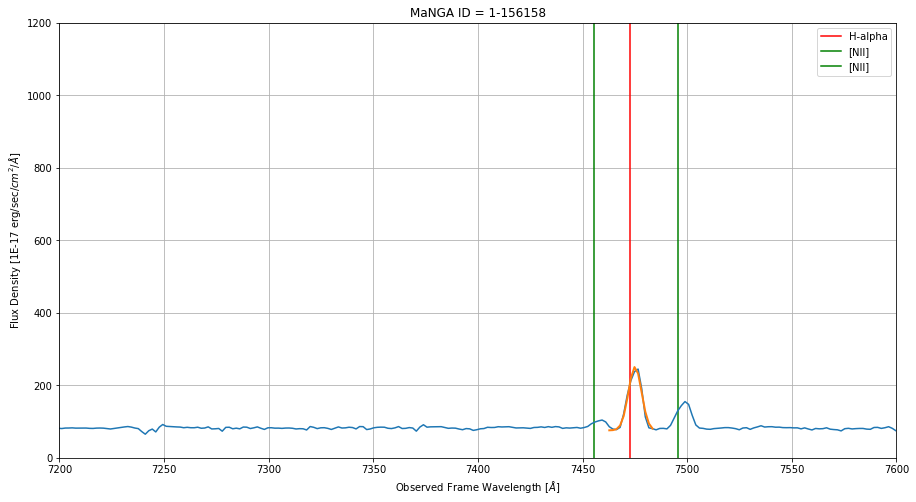

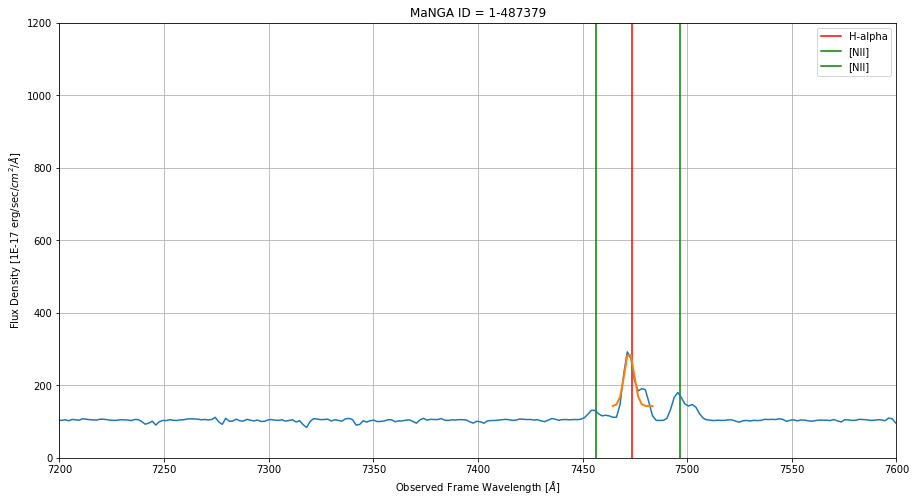

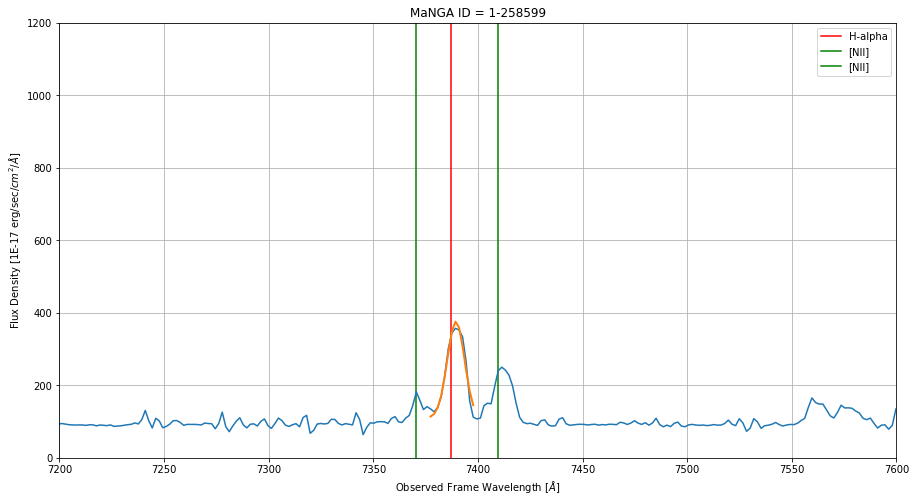

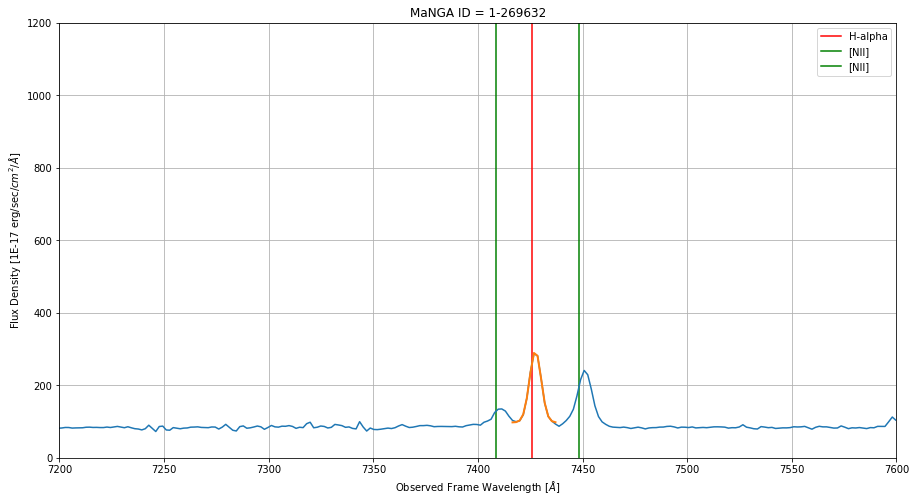

In [56]:
for plateifu in ha_list2:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak = 6563*(1+plateifu[1])
#     print(peak)
    bound = np.where(np.logical_and(wave > peak-10, wave < peak+13))
    lb = bound[0][0]
    ub = bound[0][-1]
    
    sumflux_slice = sumflux[lb : ub]
#     print(sumflux_slice)
    wave_slice = wave[lb : ub]
    
# #     print(sumflux)
    
    amp = max(sumflux_slice)
    mean = peak
    sigma = 5
#     sigma = np.std(sumflux_slice)
    base = min(sumflux_slice)
    
#     print('amp', amp)
#     print('sigma', sigma)
#     print('base', base)
    
    popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
#     print('popt', popt)
#     print('pcov', pcov)
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7200, 7600)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,1200)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, gaussian(wave_slice, *popt), linewidth = 2)
    
    plt.show()